In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile

In [2]:
cancer = load_breast_cancer()

In [3]:
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

In [4]:
x_w_noise = np.hstack([cancer.data, noise])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_w_noise, cancer.target, random_state=4, test_size=.3)
select = SelectPercentile(percentile=50)
select.fit(x_train, y_train)

SelectPercentile(percentile=50,
                 score_func=<function f_classif at 0x000002E8862A4678>)

In [6]:
x_train_selected = select.transform(x_train)

In [7]:
print('x_train.shape : {}'.format(x_train.shape))
print('x_train_selected.shape : {}'.format(x_train_selected.shape))

x_train.shape : (398, 80)
x_train_selected.shape : (398, 40)


In [8]:
mask = select.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False False  True False False False  True False False False  True
 False  True False  True False False  True False False False False False
  True False False False False False  True  True False  True False False
 False  True  True False False False False False]


Text(0.5, 0, '특성 번호')

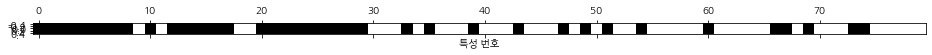

In [9]:
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('특성 번호')

In [10]:
x_test_selected = select.transform(x_test)

lr = LogisticRegression()
lr.fit(x_train, y_train)
print('전체 특성을 사용한 점수 : {:.3f}'.format(lr.score(x_test, y_test)))
lr.fit(x_train_selected, y_train)
print('선택된 일부 특성을 사용한 점수 : {:.3f}'.format(lr.score(x_test_selected, y_test)))

전체 특성을 사용한 점수 : 0.895
선택된 일부 특성을 사용한 점수 : 0.901


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [12]:
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

In [13]:
select.fit(x_train, y_train)
x_train_l1 = select.transform(x_train)
print('x_train.shape : {}'.format(x_train.shape))
print('x_train_l1.shape : {}'.format(x_train_l1.shape))

x_train.shape : (398, 80)
x_train_l1.shape : (398, 40)


Text(0.5, 0, '특성 번호')

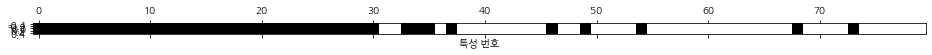

In [14]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('특성 번호')

In [15]:
x_test_l1 = select.transform(x_test)
score = LogisticRegression().fit(x_train_l1, y_train).score(x_test_l1, y_test)
print('테스트 점수 : {:.3f}'.format(score))

테스트 점수 : 0.889


In [16]:
from sklearn.feature_selection import RFE

In [17]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(x_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=42,
                                     verbose=0, warm_start=False),
    n_features_to_select=40, step=1, verbose=0)

Text(0.5, 0, '특성 번호')

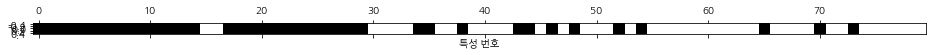

In [18]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('특성 번호')

In [19]:
x_train_rfe = select.transform(x_train)
x_test_rfe = select.transform(x_test)

score = LogisticRegression().fit(x_train_rfe, y_train).score(x_test_rfe, y_test)
print('테스트 점수 : {:.3f}'.format(score))

테스트 점수 : 0.901
